# Cohort Analysis

Cohort Analysis is a form of behavioral analytics that takes data from a given subset, such as a SaaS business, game, or e-commerce platform, and groups it into related groups rather than looking at the data as one unit. The groupings are referred to as cohorts. They share similar characteristics such as time and size.

Companies use cohort analysis to analyze customer behavior across the life cycle of each customer. In the absence of cohort analysis, businesses may experience difficulties in understanding the life cycle that each customer goes through over a given timeframe. Businesses use cohort analysis to understand the trends and patterns of customers over time and to tailor their offers of products and services to the identified cohorts.

A business sees a lot of data coming in on a daily basis. Analyzing such large volumes of data is not only complex but also an expensive task that requires dedicated staff. However, a business can break customers down into more manageable and actionable cohorts.

Once the company sees trends in how different cohorts use its products, it can identify problems in its marketing techniques and determine when and how to best communicate with different groups or types of customers. The business also uses the broken-down data to design incentives that will motivate customers to keep using their products when they are likely to stop purchasing the products.

## Types of Cohorts to Analyze

Cohorts can be grouped into the following categories:

**1.Time-Based Cohorts**

Time-based cohorts are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using a company’s products or services. The time may be monthly or quarterly, depending on the sales cycle of a company.

Analyzing the time-based cohorts helps in looking at the churn rate. For example, if customers who signed up for the company’s product in 2017 churn out faster than those who signed up in 2018, the company can use this data to find out the cause. For example, if 80% of customers who signed up with the company in the first quarter stick with the company in the fourth quarter but only 20% of customers who signed up in the second quarter stick with the company up to the fourth quarter, it shows the Q2 customers were not satisfied. The company could’ve overpromised during Q2 promotions, or a competitor may be targeting the same customers with better products or services and or with better incentives.

For a SaaS business, the churn rate tends to be high at the start of a given timeframe, and drops as the customers get used to the products. Customers who stay longer with the company tend to love the product and churn at a lower rate than at the start of a time frame. In the absence of cohorts, a company may not identify the exact cause of a high number of customers abandoning the products within a given timeframe.

**2.Segment-Based Cohorts**

Segment-based cohorts are those customers who purchased a specific product or paid for a specific service in the past. It groups customers by the type of product or level of service they signed up for. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understanding the needs of the various cohorts can help a company design tailor-made services or products for particular segments.

A SaaS company may provide different levels of services depending on the purchasing power of the target audience. Analyzing each level helps in determining which kind of services fit particular segments of your customers.

For example, if the advanced level customers churn at a much faster rate than basic level services, that is an indication that the advanced services are too expensive or that basic level services simply better meet the needs of most customers. Understanding what customers are looking for in a package helps the company in optimizing its notifications to focus on relevant push emails that customers will open and read.

**3.Size-Based Cohorts**

Size-based cohorts refer to the various sizes of customers who purchase a company’s products or services. The customers may be small and startup businesses, middle-sized businesses, and enterprise-level businesses.

Comparing the different categories of customers based on their size reveals where the largest purchases come from. For categories with the least purchases, the company can review any issues with the product and service offering and brainstorm areas for improvement that can boost the level of sales.

In a SaaS business model, small and startup businesses usually churn at a higher rate than enterprise-level companies. Small and startup businesses may have a small budget and be testing low-priced products to see what works for them. Enterprise-level businesses have a larger budget and tend to stick with a product for a longer period of time.

## Cohort Analysis : Online Retail

The dataset below gives a random sample of approximately 5,000 customers of a fictional Online Retailer. The formulas tabulate the start date of each customer, as well as the number of months away from the start date that the customer was last active in the company’s software. The cohort analysis below is a wonderful tool to differentiate between different cohorts based on time. 

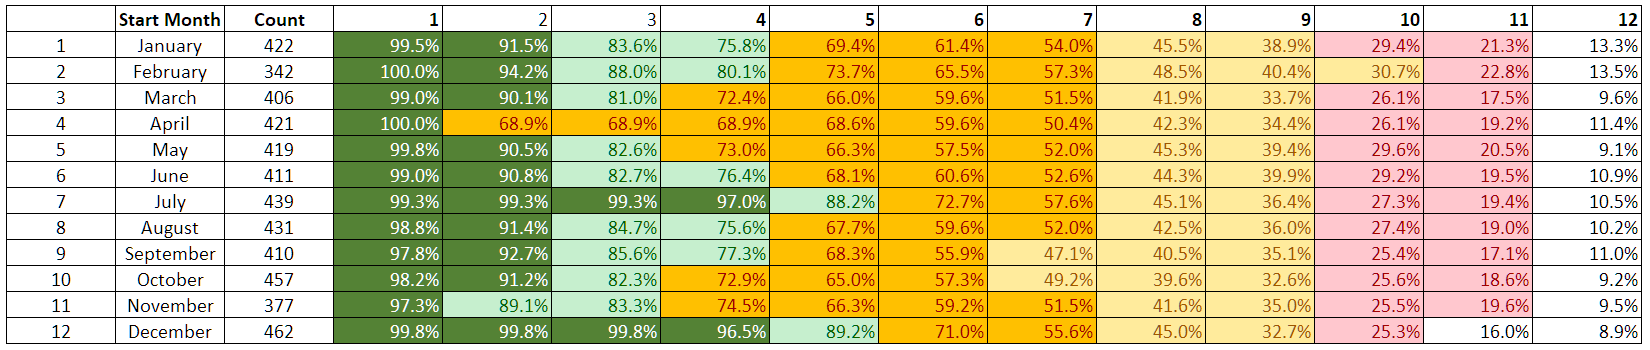

At a quick glance, we can see that the July and December months see better retention rates, where more than 95% of customers stayed until four months in. In contrast, the other months usually see that many customers stay only until two months in. This is perhaps due to a promotion that the company ran in those months, leading to higher retention. One example is Spotify’s summer promotions, where they sell 3-4 months of service for a discounted price.

On the other hand, we see a higher churn rate in April, with a huge amount of customers dropping off after the first month. Here, perhaps there was a glitch in the software the put off a large number of customers or was a terrible offering.

In [158]:
df=pd.read_excel(r"F:\Data Science and Machine Learning\Data Sets\Customer Analytics\Cohort-Analysis-Marketing-main\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [160]:
#drop rows with no customer ID
df = df.dropna(subset=['CustomerID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [161]:
#create an invoice month
import datetime as dt
#function for month
def get_month(x):
    return dt.datetime(x.year, x.month,1)  # 1 ->  first day of month
#apply the function 
df['InvoiceMonth'] = df['InvoiceDate'].apply(get_month)  
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01


In [162]:
#create a column index with the minimum invoice date aka first time customer was acquired
df['Cohort Month'] =  df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01,2010-12-01
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01,2010-12-01
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01,2010-12-01
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01,2010-12-01


In [163]:
# create a date element function to get a series for subtraction
def get_date_elements(df, column):
    day = df[column].dt.day
    month = df[column].dt.month
    year = df[column].dt.year
    return day, month, year 

In [165]:
# get date elements for our cohort and invoice columns
_,Invoice_month,Invoice_year =  get_date_elements(df,'InvoiceMonth')  # We are looking at month and year granular only
_,Cohort_month,Cohort_year =  get_date_elements(df,'Cohort Month')    # We are looking at month and year granular only

In [166]:
#check the series 
Cohort_year[:10]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Cohort Month, dtype: int32

In [168]:
#create a cohort index 
year_diff = Invoice_year -Cohort_year
month_diff = Invoice_month - Cohort_month
df['CohortIndex'] = year_diff*12+month_diff+1  # +1 to handle situation of invoice yr, mnth=cohort yr,mnth
                                               # cohort index gives total months of cohort
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,Cohort Month,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [169]:
#count the customer ID by grouping by Cohort Month  and Cohort Index 
cohort_data = df.groupby(['Cohort Month','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort Month,CohortIndex,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [170]:
# create a pivot table 
cohort_table = cohort_data.pivot(index='Cohort Month', columns=['CohortIndex'],values='CustomerID')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,298.0,89.0,97.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-01,352.0,93.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='Cohort Month'>

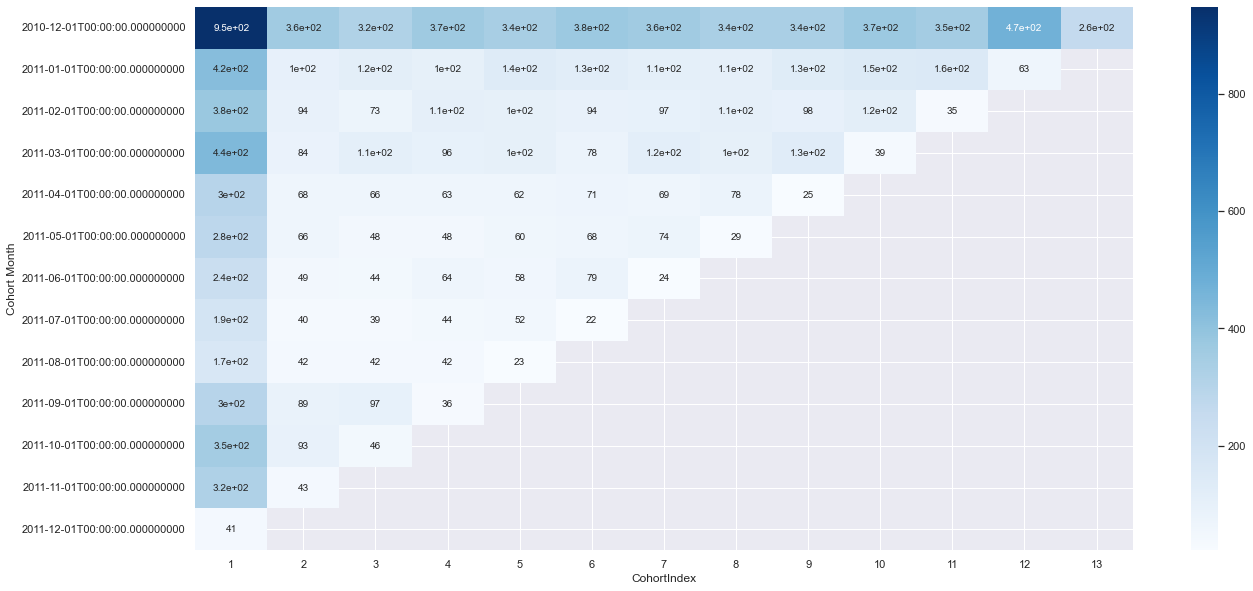

In [171]:
# change index
#cohort_table.index = cohort_table.index.strftime('%B %Y')
#visualize our results in heatmap
plt.figure(figsize=(21,10))
sns.heatmap(cohort_table,annot=True,cmap='Blues')

In [172]:
#cohort table for percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0) # Divide cohort table by first element of each row
new_cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,1.0,0.298658,0.325503,0.120805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-01,1.0,0.264205,0.130682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortIndex', ylabel='Cohort Month'>

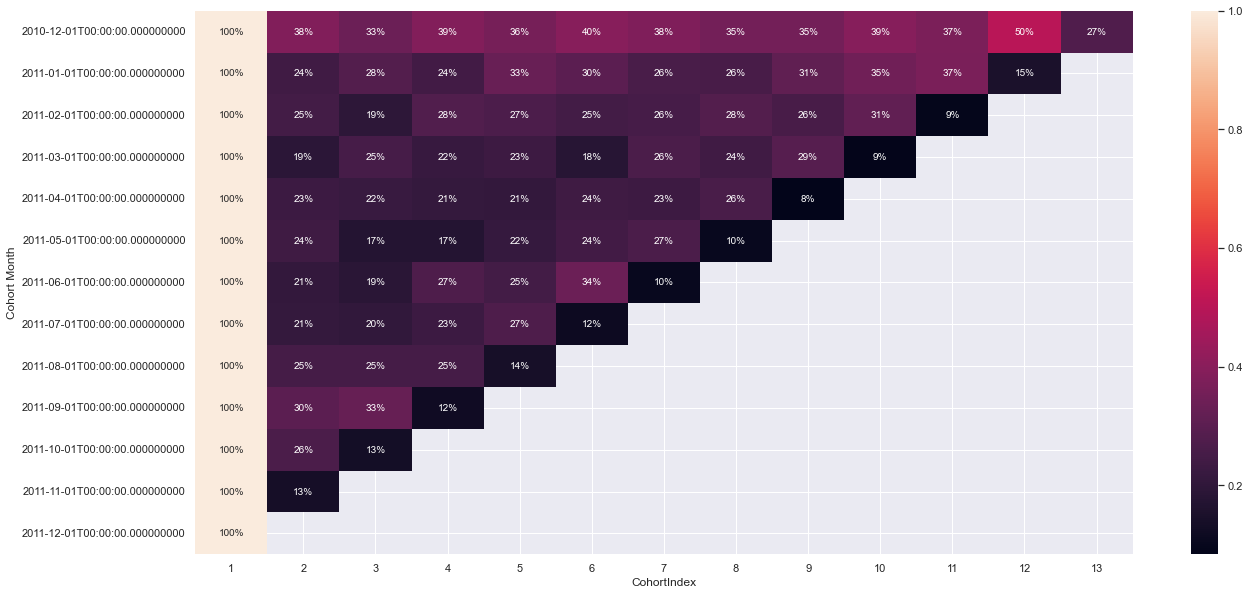

In [173]:
#create a percentages visual
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')

We can use the above heatmap to see the retention of cohorts. December 2011 shows 50% of cohorts from 2010 active. Only 27% of Cohorts from 2010-12 remains at 13 months mark.  Evaluate each index month with any marketing/promotional activities of the company to see weather that was fruitful in bringing back the cohorts. 

## Combining Cohorts
No one type of cohort analysis is necessarily better than another. Rather, businesses should combine two or more of these segments to gain a deeper understanding of how customers are keeping up with their products.